In [24]:
import xarray as xr
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
# open dataset
f = xr.open_dataset('seNorge2018_RR_1957_2017.nc')

In [26]:
# f['time'][:]
# f.summary
f['rr'] # - units: kg/m2 -> precipitation data 

<xarray.DataArray 'rr' (time: 22280, Y: 1550, X: 1195)>
[41268130000 values with dtype=float32]
Coordinates:
  * X        (X) float64 -7.45e+04 -7.35e+04 -7.25e+04 ... 1.118e+06 1.12e+06
  * Y        (Y) float64 8e+06 7.998e+06 7.998e+06 ... 6.452e+06 6.450e+06
  * time     (time) datetime64[ns] 1957-01-01T06:00:00 ... 2017-12-31T06:00:00
    lon      (Y, X) float32 ...
    lat      (Y, X) float32 ...
Attributes:
    units:          kg/m^2
    grid_mapping:   UTM_Zone_33
    long_name:      daily total precipitation (06-06)
    standard_name:  precipitation_amount
    cell_methods:   time: sum
    version:        1.0
    prod_date:      2018-12-07

In [27]:
# round dates to 'day'
f_days = f.assign(date = lambda f: f.time.dt.round('D')) 
# add weekday
f_days_of_week = f_days.assign(day_of_week = lambda f: f_days.date.dt.weekday) 

In [28]:
# whats it looks like: 
f_days_of_week['day_of_week']

<xarray.DataArray 'day_of_week' (time: 22280)>
array([1, 2, 3, ..., 4, 5, 6])
Coordinates:
  * time     (time) datetime64[ns] 1957-01-01T06:00:00 ... 2017-12-31T06:00:00

In [29]:
# the entire dataset
# groups:
# a = f_days_of_week.groupby("day_of_week").groups

# group by day of week
# xmean = f_days_of_week.groupby('day_of_week').mean()

In [30]:
# what xmean looks like
# xmean

In [49]:
## ----- take subset:

# take only 1 year:
rain2016 = f_days_of_week.sel(time=slice("2016-01-01", "2016-12-31"))
# group by day of week
mean2016 = rain2016.groupby('day_of_week').mean()

/opt/anaconda3/envs/rain/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [50]:
mean2016_rain = mean2016['rr']#.plot()
# mean2016_rain.plot()

In [51]:
# separate days:
day0 = mean2016_rain.isel(day_of_week=0)
day1 = mean2016_rain.isel(day_of_week=1)
day2 = mean2016_rain.isel(day_of_week=2)
day3 = mean2016_rain.isel(day_of_week=3)
day4 = mean2016_rain.isel(day_of_week=4)
day5 = mean2016_rain.isel(day_of_week=5)
day6 = mean2016_rain.isel(day_of_week=6)

In [52]:
# day0.plot(vmin=0, vmax=20)
# day1.plot(vmin=0, vmax=20)
# day2.plot(vmin=0, vmax=20)
# day3.plot(vmin=0, vmax=20)
# day4.plot(vmin=0, vmax=20)
# day5.plot(vmin=0, vmax=20)
# day6.plot(vmin=0, vmax=20)


In [53]:
# day3.plot.hist()

In [54]:
hasoutliers = mean2016_rain.isel(day_of_week=slice(0, 6)).copy()

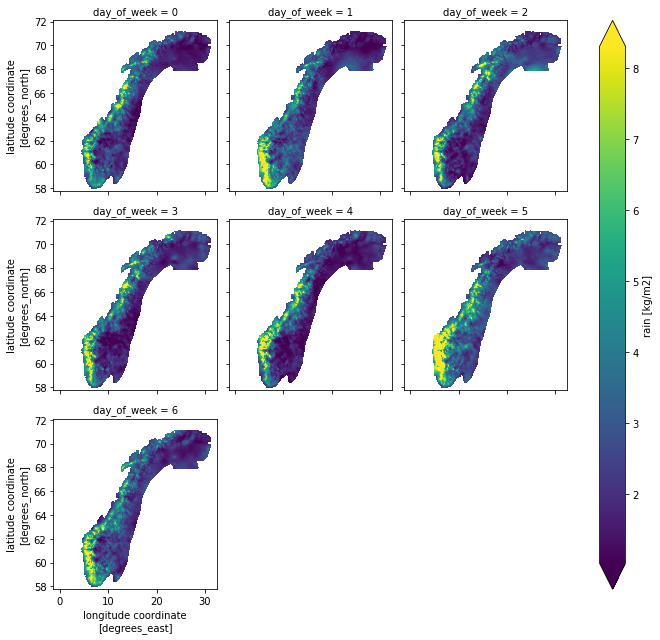

In [55]:
g = mean2016_rain.plot.pcolormesh(
    "lon",
    "lat",
    col="day_of_week",
    col_wrap=3,
    robust=True,
    cmap="viridis",
    cbar_kwargs={"label": "rain [kg/m2]"},
)

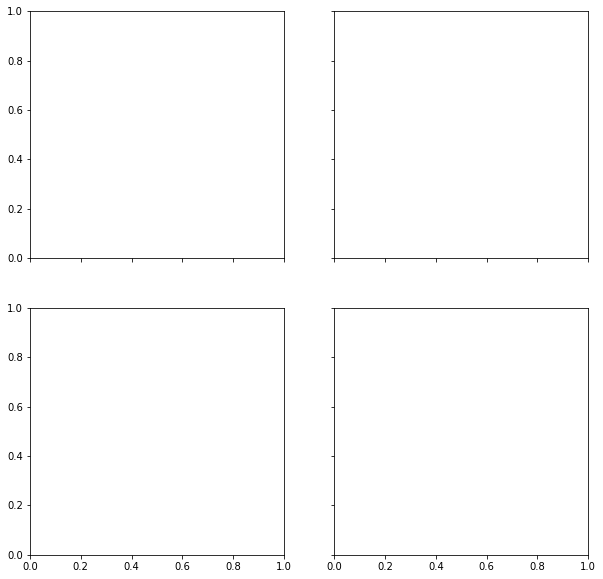

In [142]:
## plot data: 

# create a 2x2 matrix of axes that use the same x and y limits
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))

def plot_hist(ax):
    '''
    A function to plot a 2d histogram
    
    This mainly exists to make it easier to edit all 4 plots at once
    
    hist2d returns all of the histogram information and the updated 
    axes object. this function only returns the updated axes object.
    '''
    x1, x2, x3, cbar = ax.hist2d(x[:,0], x[:,1], bins=50, cmap='plasma')
    return cbar

#plot_hist(ax[0][0])
#plot_hist(ax[0][1])
#plot_hist(ax[1][0])
#
## returns the quadmesh axis that is necessary to know informations about
## the colormaps. see above function
#cbar = plot_hist(ax[1][1])